In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn import datasets,linear_model
import pandas as pd
import numpy as np


In [2]:
# pd.read_csv()

# Dragon Real Estate Price Predictor

In [3]:
housing = pd.read_csv('C:\\Users\\V_K\\OneDrive\\Documents\\JupyterCodes\\Ml_project_1\\HousePriceML.csv')
print(housing.head(50))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87     0  0.524  5.889   39.0

In [4]:
df = housing.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
print(housing['CHAS'].value_counts() )

0    471
1     35
Name: CHAS, dtype: int64


In [6]:
housing.isnull().sum()/housing.shape[0]*100  # 

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


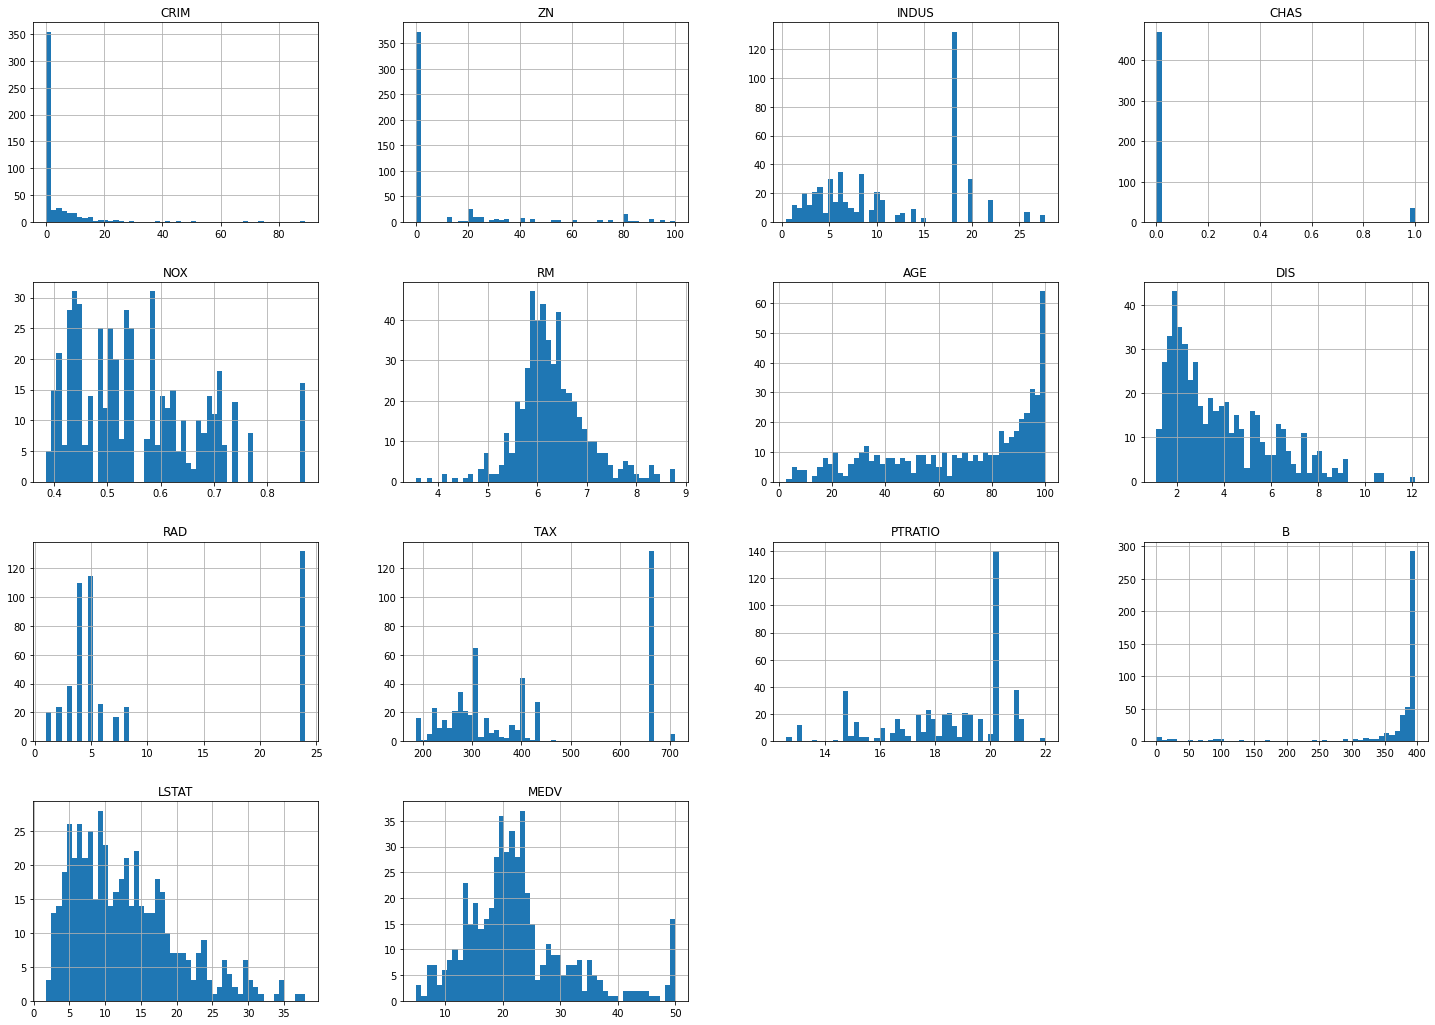

In [8]:
# plt.figure()
housing.hist(bins = 50,figsize=(25, 18))
plt.show()

## Train test spliting

In [9]:
# For learning pupose
def split_train_test(data, test_ratio):
    np.random.seed(42)    # this line create same shuffle
    shuffled = np.random.permutation(len(data))    # ye line diven data set o randomly shuffled kr dega 
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size :]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
train_set_byfun,test_set_byfun = split_train_test(housing,0.2)


In [11]:
print('Rows in train data set _by fun : ',len(train_set_byfun))
print('Rows in test data set _by fun: ',len(test_set_byfun))

Rows in train data set _by fun :  405
Rows in test data set _by fun:  101


### Ye jo function line spli ke liye, upar likh rkhi hai ye sklearn provide krata hai ao dekhte hai kaise

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing ,test_size=0.2,random_state = 42)
print('Rows in train data set by sk learn: ',len(train_set))
print('Rows in test data set by sk learn : ',len(test_set))

Rows in train data set by sk learn:  404
Rows in test data set by sk learn :  102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1,test_size =0.2,random_state=42 )


In [73]:
for train_index, test_index in (split.split(housing,housing['CHAS']) ):
    strat_train_set = housing.loc[train_index]
    strat_test_set  =  housing.loc[test_index]

In [15]:
train_index

array([254, 348, 476, 321, 326, 411, 250, 100, 429,  57, 413, 115, 490,
       199, 494, 142, 113, 468, 400, 247, 151, 408,  68, 365,  81,  93,
       456, 116,  27, 234, 140,  47, 382, 377, 366, 185,  73, 267, 231,
       118,  96,  40, 182, 417, 492, 373, 294, 482,  62, 414, 289,  72,
       314,  89, 129, 157, 110, 343, 200, 310, 462, 361,  95,  37, 145,
       227, 166,  23,  85, 281, 285, 264, 501, 440, 241, 473,   0, 488,
       452, 323, 252, 416, 119,  60, 251, 409, 191,  42, 188, 412,  92,
       353, 292, 107,  12,   3, 364, 339, 301, 467, 376, 280, 309, 202,
        61,  24, 122, 164, 278, 139,  10, 415, 390, 338, 445, 486, 156,
       179, 159,  22, 318, 404, 425,  45,  74, 147, 431, 215, 434,  44,
        83, 144, 500, 406, 161, 331, 243, 293,  86, 162, 458, 359, 295,
       124, 341, 244, 319, 337,  15, 384, 248, 441, 258,  31, 481, 450,
       316,  66,  56, 211, 184, 325,  41,  11, 262, 491, 177, 369, 249,
       238, 125,   5, 224, 235, 334, 165, 475,  63, 437, 497, 22

In [16]:
type(housing)
housing.shape

(506, 14)

In [76]:
print(strat_test_set['CHAS'].value_counts() );#print(95/7)
print(strat_train_set['CHAS'].value_counts() );#print(376/28)

0    95
1     7
Name: CHAS, dtype: int64
0    376
1     28
Name: CHAS, dtype: int64


Here if want to check percentage of zeros and one in test and train data sets ,
me to  test me= 13.571428571428571
and train me  = 13.428571428571429
Approximatly same aa rhe hai  iska matlab hamara CHAS data dono me eaquale ratio me participate kr rha hai

## Now we move for Correlation between data

In [18]:
corr_matrix = housing.corr()


In [19]:
# hm yaha ghar ke price ko lekar ,and others room number RM ,B bhk size,and area me crime rate kya hia, insab pr kaise
# depende krata hai 
corr_matrix['MEDV'].sort_values(ascending=False)    # This show pearson co-relation

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

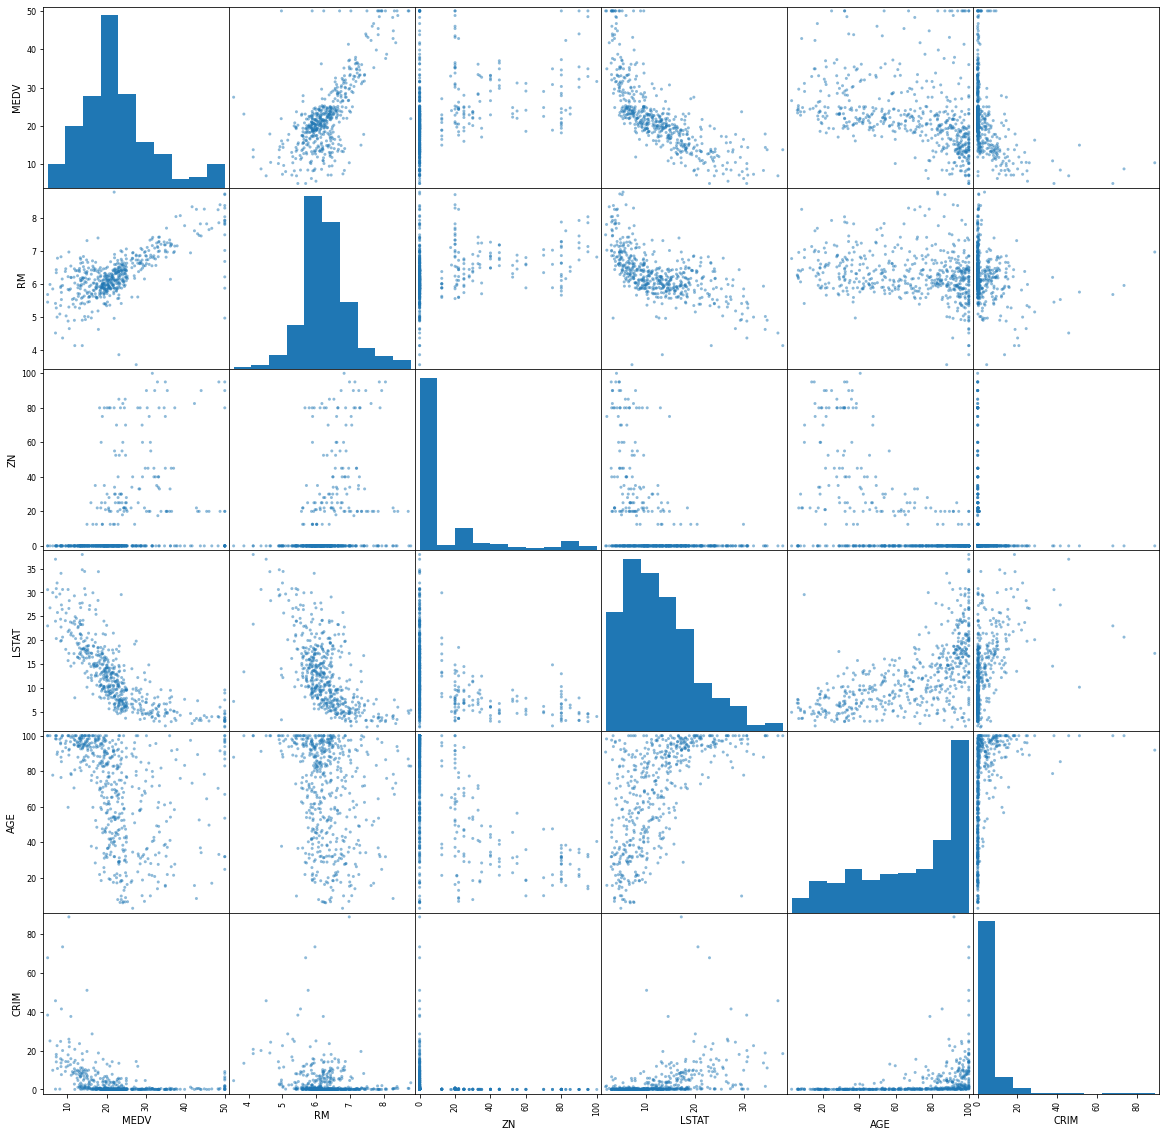

In [20]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','ZN','LSTAT','AGE','CRIM']
scatter_matrix(housing[attributes],figsize = (20,20))
plt.show()

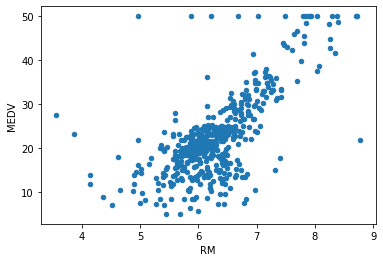

In [21]:
## for looking on the one perticuler plot
# alpha = scatter density badata hai
# kind = jis bhi tarah ka plot dekhna hai dekh sakte ho
# housing.plot(kind = 'hist',x='RM',y='MEDV',alpha =1)  # ye bhi teek hi hai
housing.plot(kind = 'scatter',x='RM',y='MEDV',alpha =1)  # ye best output dikh rha hai
# housing.plot(kind = 'bar',x='RM',y='MEDV',alpha =1)   # isme bhi kucch kucch clear nhi hai
# housing.plot(kind = 'line',x='RM',y='MEDV',alpha =1)  # ssabe ghatita kucch na samjh aa rha 
plt.show()

## Try out to combining the Two or more attributes

In [22]:
housing['TAXRM']= housing['TAX']/housing['RM']   # showing the tax ratio over the room
housing['TAXRM']

0      45.019011
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: TAXRM, Length: 506, dtype: float64

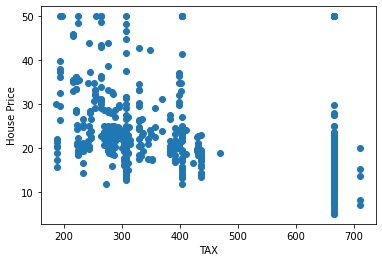

-0.468535933567767

In [23]:
# Ab ham coorelation dekhenge ki harnumber of room badane pr tax pr effect kya ho rha h ai and rax room ratio ka price 
# pr kya effect pd rha hai
plt.scatter(housing['TAX'],housing['MEDV'] )
plt.xlabel('TAX')
plt.ylabel('House Price')
plt.show()
housing['MEDV'].corr(housing['TAX'])

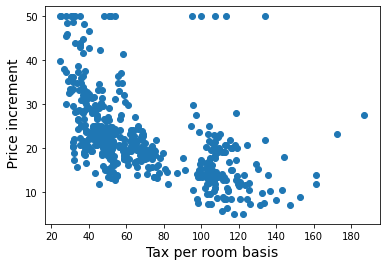

the existing correlation :  -0.5376496863047937


In [24]:

plt.scatter(housing['TAXRM'],housing['MEDV'])
plt.xlabel('Tax per room basis' ,fontsize =14)
plt.ylabel(' Price increment' ,fontsize =14) 
plt.show()
print('the existing correlation : ',housing['MEDV'].corr(housing['TAXRM']))

In [25]:
housing_num_tr  = strat_train_set.drop('MEDV',axis =1)
print(housing)
housing_label = strat_train_set['MEDV'].copy()
print('Housing Labels are : ',housing_label)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV      TAXRM  
0       15.3  396.90   4.98  24.0  45.019011  
1       17.8  396.90   9.14  

## Note
### How to deal with missing value

In [26]:
housing_missing = pd.read_csv('C:\\Users\\V_K\\OneDrive\\Documents\\JupyterCodes\\Ml_project_1\\HousePriceML with missing Value.csv')
print(housing_missing.head(50))
print('how many value is NAN : ' ,housing_missing.isnull().sum()/housing_missing.shape[0]*100)

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10  0.22489  12.5   7.87     0  0.524    NaN   94.3  6.3467    5  311   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87     0  0.524  5.889   39.0

In [27]:
# As we can see Rm have 0.98+ % of data is missing
# also can be cheack by describe
print(housing_missing.describe())
print('RAM have 501.000000 count and other placees are 506')

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.281393   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.697100   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [28]:
# To Take care of missing attribute
# 1 get rid of missing data point
# 2 get rid of the whole attribute
# 3 set the value to means.medain or zero 


In [29]:
# method_1
method1 = housing_missing.dropna(subset = ['RM'])
# method1  its wil delete the rows where NAN exist

In [30]:
method2 = housing_missing.drop('RM',axis =1)   # it will delete the row of the data fromo for NaN
method2

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [31]:
# method3
median_val = housing_missing['RM'].median()   # Computaion of median 
housing_fill_median= housing_missing['RM'].fillna(median_val)
print(housing_fill_median.isnull().sum())

0


In [32]:
# take care eeach and every thing what you have been calculated same think can don by SkLearn by imputer
from sklearn.impute import SimpleImputer
imp_out = SimpleImputer(strategy='median')
imp_out.fit(housing_missing)


SimpleImputer(strategy='median')

In [33]:
imp_out.statistics_

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01, 2.12000e+01])

### Now we will convert the transformed dataset into the dataframe

In [34]:
X = imp_out.transform(housing_missing)
print(X.shape)

(506, 14)


In [35]:
housing_tr_missing = pd.DataFrame(X,columns = housing_missing.columns)

In [36]:
housing_tr_missing.describe()   #Now you can see that No value have NaN

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.280678,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.693677,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [37]:
print(housing_tr_missing.isnull().sum()/housing_tr_missing.shape[0]*100)
print('-----------------------------Data is Clean')



housing_tr = housing_tr_missing

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64
-----------------------------Data is Clean


## Note End

### Scikit-Learn Design

Feature Scalling
Primaly Two type of feature scalliing use :-
1. Min-Max Scalling (Normalization)  =[actual value - min of value]/[Max of value - min of value]
    Sklearn provide a class called MinMaxScaler for this

2. Standardization
    [value -mean]/[std]
    Sklearn provide a class called StandrdScaler for this
Pipeline  means creating somthing in series of step

## Pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [39]:
my_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),
#                         You can add add coomand as yoy want
                        ('std_scalar', StandardScaler())])
print(Pipeline)

<class 'sklearn.pipeline.Pipeline'>


In [40]:
housing_num_tr = my_pipeline.fit_transform(housing_num_tr)
print('SHAPE OF dataset',housing_num_tr.shape)
print(housing_num_tr)

SHAPE OF dataset (404, 13)
[[-0.43942006  3.12628155 -1.12165014 ... -0.97491834  0.41164221
  -0.86091034]
 [-0.44352175  3.12628155 -1.35893781 ... -0.69277865  0.39131918
  -0.94116739]
 [ 0.15682292 -0.4898311   0.98336806 ...  0.81196637  0.44624347
   0.81480158]
 ...
 [-0.43525657 -0.4898311  -1.23083158 ... -0.22254583  0.41831233
  -1.27603303]
 [ 0.14210728 -0.4898311   0.98336806 ...  0.81196637 -3.15239177
   0.73869575]
 [-0.43974024 -0.4898311   0.37049623 ... -0.97491834  0.41070422
   0.09940681]]


### Selecting a desire model fro dragon real Estrates

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor 
# classifire, ensemble= iska matlab multiple classifire ko combine krke classire banana or uka use krna

In [44]:
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

In [45]:

model.fit(housing_num_tr,housing_label )

RandomForestRegressor()

In [46]:
some_data = housing_num_tr[:5]
some_labels = housing_label[:5]


In [47]:
prepared_data = my_pipeline.transform(some_data)

C:\Users\V_K\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [48]:
prediced_data = model.predict(prepared_data)
print(prediced_data)

[26.477 26.829 43.412 43.551 43.551]


In [49]:
actual_data = list(some_labels )
print(actual_data)

[21.9, 24.5, 16.7, 23.1, 23.0]


In [50]:
print('Percentage error between actual data and predicted weights : ',(actual_data - prediced_data )/actual_data*100)

Percentage error between actual data and predicted weights :  [ -20.89954338   -9.50612245 -159.95209581  -88.53246753  -89.35217391]


In [51]:
from sklearn.metrics import mean_absolute_error
housing_prediction = model.predict( housing_num_tr )  # model ko precdict kr ke house predicted value ko substute kr rha h

In [52]:
mse = mean_squared_error(housing_label,housing_prediction)

In [53]:
mse = np.sqrt(mse)
print(mse)
print('Zero error means data hase been over fitted',"  it is Hormfull ")

1.1631531338870584
Zero error means data hase been over fitted   it is Hormfull 


### Using better evaluation technique
by Cross validation means select one and train data for training   [1,2,3,4,5,6,4]

In [54]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,housing_num_tr,housing_label,scoring = 'neg_mean_squared_error',cv= 10)
rmse_score = np.sqrt(-score)
rmse_score         # Now it is okay for validation

array([2.79289168, 2.69441597, 4.40018895, 2.56972379, 3.33073436,
       2.62687167, 4.77007351, 3.27403209, 3.38378214, 3.16691711])

In [55]:
def print_scores(score):
    print('Scores             : ',score)
    print('Mean               :',score.mean())
    print('Standerd deviation : ', score.std())

In [56]:
print_scores(rmse_score)

Scores             :  [2.79289168 2.69441597 4.40018895 2.56972379 3.33073436 2.62687167
 4.77007351 3.27403209 3.38378214 3.16691711]
Mean               : 3.3009631251857217
Standerd deviation :  0.7076841067486248


model outputs from diffrent  models 

1) linear regression

    Scores             :  [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
                             7.47384779 5.48226252 4.14885722 6.0669122 ]
    Mean               : 5.030437102767305
    Standerd deviation :  1.060766115829483

2) Dession tree regression model 

	Scores             :  [4.11979161 5.314178   5.52104621 4.02295244 4.12743867 3.05973855
	 5.08763206 3.89152926 3.3404341  4.40545117]
	Mean               : 4.289019207968318
	Standerd deviation :  0.7690683083752209

3) using of randomforest regrassion
	Scores             :  [2.79289168 2.69441597 4.40018895 2.56972379 3.33073436 2.62687167
	 4.77007351 3.27403209 3.38378214 3.16691711]
	Mean               : 3.3009631251857217
	Standerd deviation :  0.7076841067486248

### Takecare of maginitude ,no matter whatever sign

#### From above we can see that the Random forest regressor provide best fit comprare to there models so here we are choosing this model to solve this perticuler problem

Quize ; create this python jupyter fiel in python criript and run intothe visual studio code

###  Create above a function to create a results score , mean ,Standderd deviation and select the model from the minimum scoring model ?

### Saving the model

In [57]:
from joblib import dump, load
dump(model, 'Harry_ML_project_model_1.joblib' )

['Harry_ML_project_model_1.joblib']

In [58]:
# joblib.dump(value, filename, compress=0, protocol=None, cache_size=None)  use for cover the model in a file

### Testing the model on test data

In [59]:
X_test = strat_test_set.drop('MEDV',axis=1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared =  my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_prediction)
final_rmse = np.sqrt(final_mse)
print('Our Final Root mean Squared error is : ',final_rmse)
print('Our Final Prediction is : ',final_prediction)
print('our initiatial dataset : ',list(Y_test))

Our Final Root mean Squared error is :  2.948844070638726
Our Final Prediction is :  [24.895 11.466 25.439 21.974 18.471 14.873 19.897 14.416 31.435 40.68
 20.067 11.776 24.004 28.999 19.503 10.679 31.58  14.492 23.586 18.94
 19.767 17.955 17.534 22.073 18.429 30.549 16.416 32.69   8.952 33.616
 23.715 21.26  22.98  10.808 20.924 11.293 42.541 24.308 23.292 41.623
 23.753 29.423 20.594 20.912 19.565 33.578 44.468 19.92  20.344 21.768
 21.492 14.514 21.169 15.094 24.771 32.651 42.389 28.135 19.353 20.837
 47.322  9.96  18.674 24.579 15.057 32.746 19.461 18.158 19.014 33.84
 27.27  22.85  21.519 22.436 34.997 12.793 15.94  20.048 20.726 21.379
 22.303 21.651 14.429 22.832 20.848 21.168 13.933 21.346 22.005 23.151
 18.865 27.24   7.276 26.14  18.817 29.887 19.692 31.073 14.663 26.607
 20.713 20.087]
our initiatial dataset :  [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.

In [60]:
# print(list(Y_test) )
# print(list(final_prediction)) 

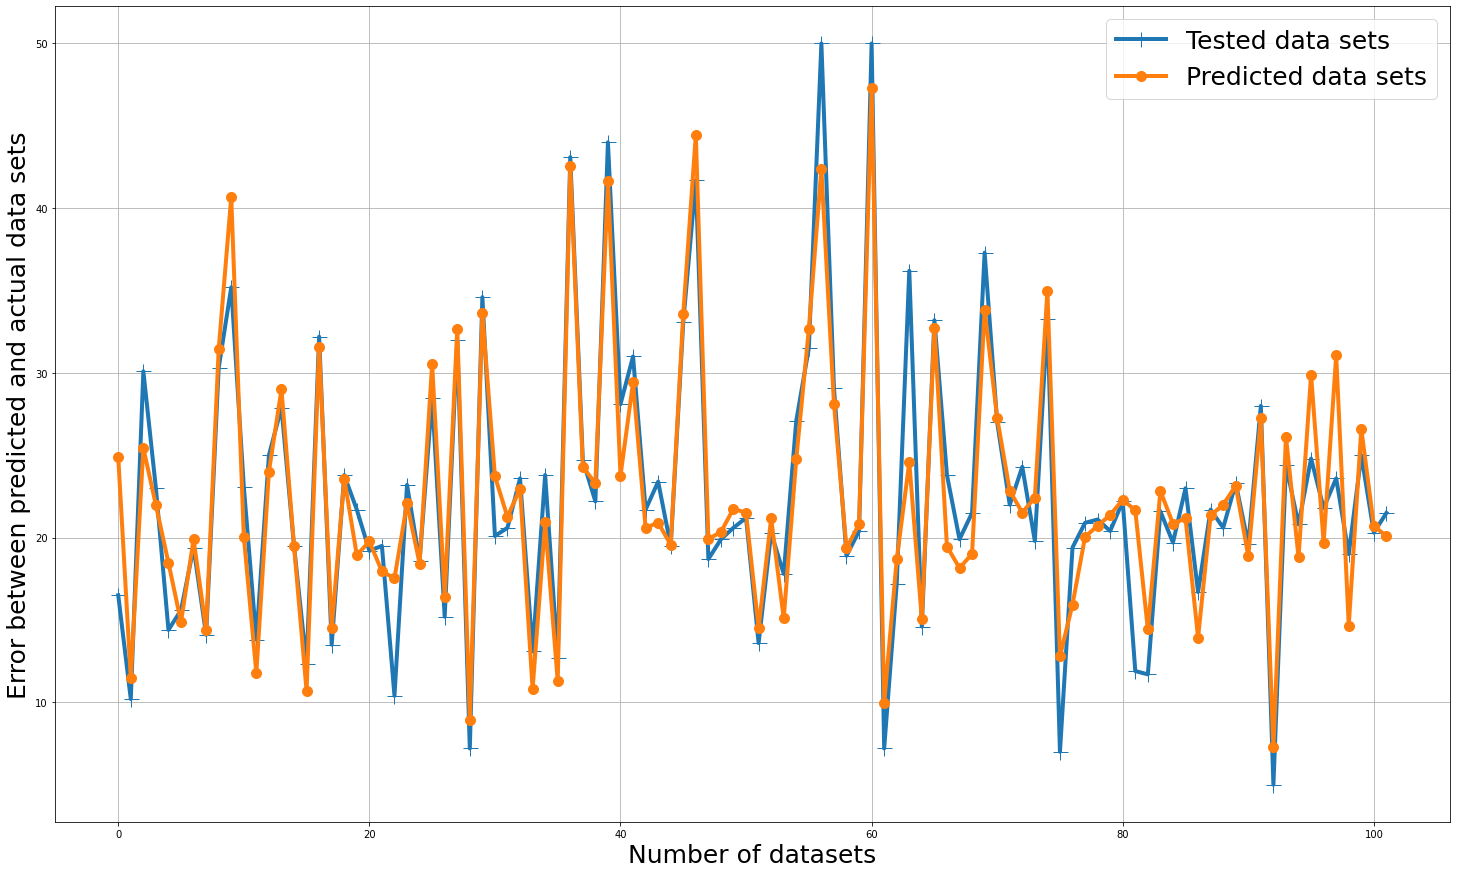

In [61]:
plt.figure(figsize=(25,15))
plt.plot(list(Y_test),'-+',markersize =15,linewidth =4,label ='Tested data sets ' )
plt.plot(list(final_prediction) ,'-o',markersize =10,linewidth =4,label = 'Predicted data sets')
# type(list(np.linspace(0,127)) ).
plt.legend()
plt.xlabel('Number of datasets',fontsize =25)
plt.ylabel('Error between predicted and actual data sets',fontsize =25)
plt.legend(fontsize =25)
plt.grid()
plt.show()


# Now WE can move for use to model what we have been created

## Now we are lloking for correation between them
#### Take Care ham data test data set ko touch bhi nhi kr sakte

In [62]:

housing_matrix = strat_train_set.corr()
print(strat_train_set.shape)
housing_matrix['RM'].sort_values()

(404, 14)


LSTAT     -0.600731
INDUS     -0.382255
PTRATIO   -0.329010
NOX       -0.300178
TAX       -0.281568
CRIM      -0.257375
AGE       -0.241281
RAD       -0.199079
CHAS       0.100082
B          0.122469
DIS        0.206304
ZN         0.293363
MEDV       0.679894
RM         1.000000
Name: RM, dtype: float64

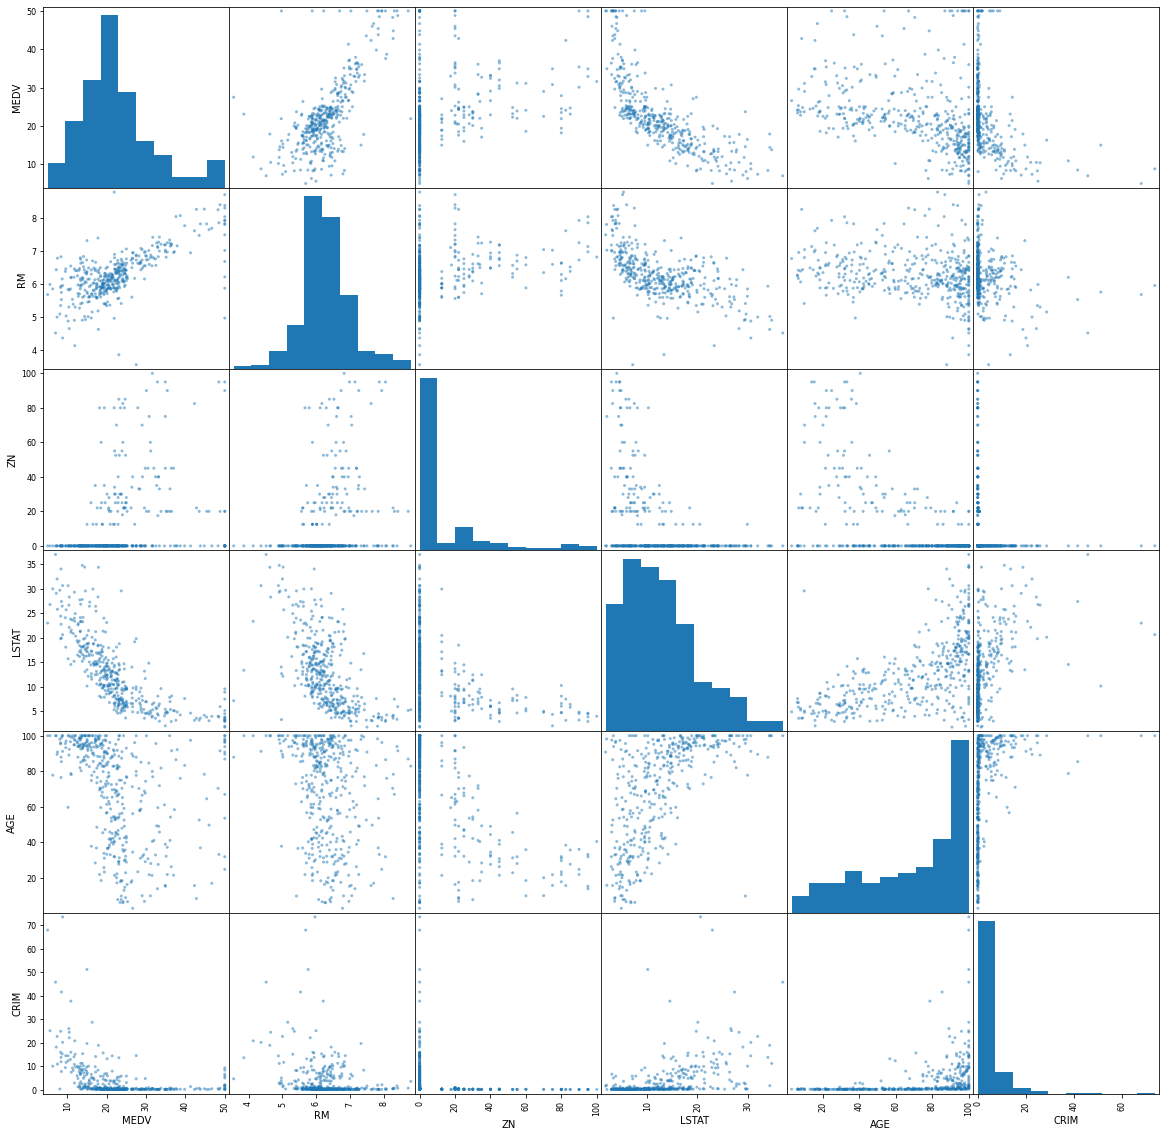

In [63]:
from pandas.plotting import scatter_matrix
# attributes = ['Rm','LSTAT' , 'INDUS' ,'PTRATIO' ,'NOX','TAX','AGE', 'CRIM ', 'RAD', 'DIS','ZN','MEDV']
attributes = ['MEDV','RM','ZN','LSTAT','AGE','CRIM']
scatter_matrix(strat_train_set[attributes],figsize =(20,20),alpha= 0.5)
# plt.xlabel(attributes)
plt.show()

## How the model will work

In [64]:
from joblib import dump,load
# model =load('file_name.extension')
model =load('Harry_ML_project_model_1.joblib ')

# How to use
import numpy as np
# Dhyan rhe features ko ak dm squence me rkhana hai
input_the_features = np.array([[ 50.49969807,  -0.34851877,  -1.81482858,  -1.3473565 ,
       -106.96810922,  29.15786608,  200.49270477,  -0.541435  ,
        -1.23122528,  20.45108771,  -9.14517516,  -3.67879322,
        -1.88915683]])
model.predict(input_the_features)

array([40.74])

In [65]:
# housing['CHAS']